<a href="https://colab.research.google.com/github/SenaKymk/pupilica_ai_bootcamp_assignment/blob/main/knnExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# gerekli kutuphaneleri iceriye aktar
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

In [2]:
# veri setini yukle
cancer = load_breast_cancer()
df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
df["target"] = cancer.target
df.head(15)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,0


In [3]:
# feauture ve hedef degiskenleri elde et ve feaureler genelde büyük harfle yazılır
X = cancer.data
y = cancer.target

In [4]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2)
#yani 569 tane verinin %30 unu test %70 ini train için ayırdık
#random state demezsek train ve test veriseti random bir biçimde seçilir bu yüzden acurasy değeleri hep farklı olur

In [5]:
# standardization işlemi yapılır
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#test verisetine fit etmeyiz çünkü standardizasyon işlemi sadece train verisetine yapılır.
#bu yüzden test verietini sadece dönüştür


In [6]:
# KNN tanimla ve train
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train) # training

KNeighborsClassifier(n_neighbors=3)

In [7]:
# KNN test edelim ve dogruluk hesapla
y_pred = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

In [8]:
accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy}")
print(f"Trainining Accuracy: {accuracy_score(y_train, y_pred_train)}")

#train ve test veriseti random bir biçimde seçilir bu yüzden acurasy değeleri hep farklı olur

Test Accuracy: 0.9824561403508771
Trainining Accuracy: 0.9773869346733668


Hiperparametre belirlenmesi

In [9]:
# %% hyperparameter tuning
import matplotlib.pyplot as plt

In [10]:
k_values = []
accuracy_values = []

In [11]:
#k değerlerine karşılık gelen accuracy değerlerimiz
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    k_values.append(k)
    accuracy_values.append(accuracy)



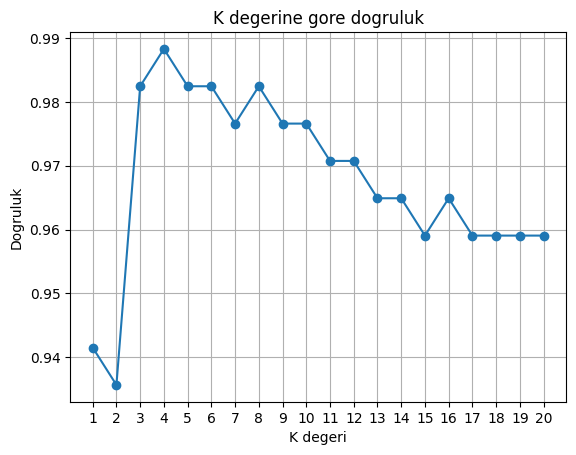

In [12]:
plt.figure()
plt.plot(k_values, accuracy_values, marker = "o")
plt.title("K degerine gore dogruluk")
plt.xlabel("K degeri")
plt.ylabel("Dogruluk")
plt.xticks(k_values)
plt.grid(True)


In [13]:
# %% kullanilacak mesafe metriginin tanimlanmasi
distance_metrics = ["euclidean", "manhattan"]
for distance_metric in distance_metrics:
    knn = KNeighborsClassifier(n_neighbors=4, metric=distance_metric)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Distance metric: {distance_metric}")
    print(f"Accuracy: {accuracy}")


Distance metric: euclidean
Accuracy: 0.9883040935672515
Distance metric: manhattan
Accuracy: 0.9649122807017544


In [14]:
import matplotlib.pyplot as plt

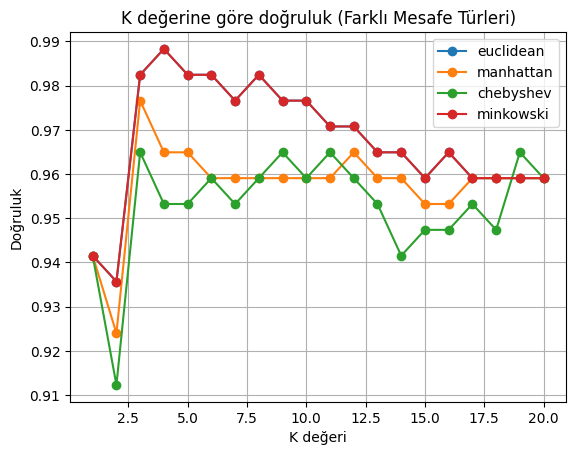

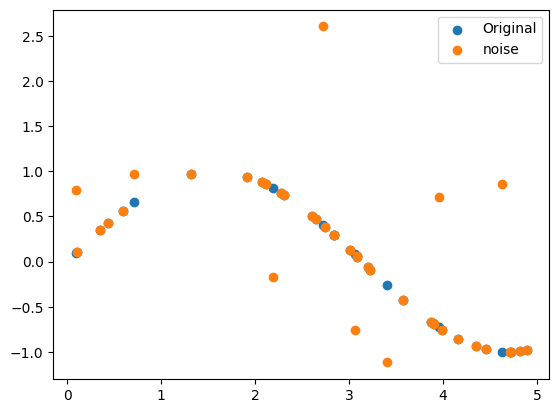

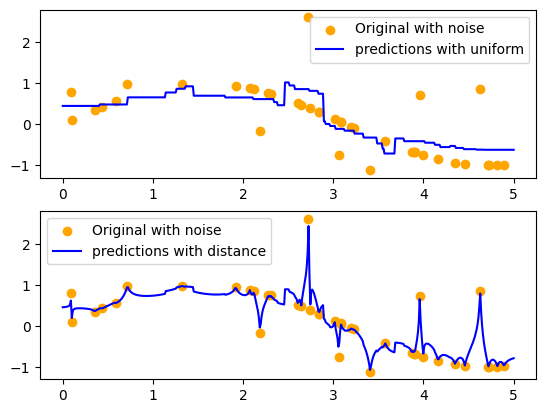

In [15]:
distance_metrics = ["euclidean", "manhattan", "chebyshev", "minkowski"]
results = {}


for distance_metric in distance_metrics:
    k_values = []
    accuracy_values = []

    for k in range(1, 21):
        knn = KNeighborsClassifier(n_neighbors=k, metric=distance_metric)
        knn.fit(X_train, y_train)

        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        k_values.append(k)
        accuracy_values.append(accuracy)


    results[distance_metric] = (k_values, accuracy_values)

plt.figure()
for distance_metric in distance_metrics:
    k_values, accuracy_values = results[distance_metric]
    plt.plot(k_values, accuracy_values, marker="o", label=f"{distance_metric}")

plt.title("K değerine göre doğruluk (Farklı Mesafe Türleri)")
plt.xlabel("K değeri")
plt.ylabel("Doğruluk")
plt.legend()
plt.grid(True)
plt.show()

# %% KNN Regression

from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)
X = np.sort(5*np.random.rand(40,1), axis = 0)
y = np.sin(X).ravel()

plt.figure()
plt.scatter(X,y, label = "Original")

y[::5] += 5* (0.5 - np.random.rand(8))
plt.scatter(X,y, label = "noise")
plt.legend()

n_neighbors = 5
T = np.linspace(0, 5, 500)[:, np.newaxis]

plt.figure()
for i, weights in enumerate(["uniform","distance"]):
    knn = KNeighborsRegressor(n_neighbors, weights=weights)
    y_pred = knn.fit(X,y).predict(T)

    plt.subplot(2,1,i+1)
    plt.scatter(X,y,color = "orange", label = "Original with noise")
    plt.plot(T, y_pred, color = "blue", label = f"predictions with {weights}")
    plt.legend()


